1.
Tyrimo pavadinimas - Dviračių dalinimosi sitemos duomenų statistinė analizė. 
Autorius - Martynas Stelmokas,.
Data - 2024-10-31. 

2.
Tikslas:
Šio projekto „Dviračių dalinimosi sistemos duomenų statistinė analizė“ tikslas – sukurti modelį, kuris įvertina ir numato dviračių dalinimosi paklausą remiantis istorinių naudojimo duomenų analize. Šis modelis siekia padėti priimti sprendimus, pateikdamas įžvalgas apie pagrindinius veiksnius, lemiančius dviračių nuomą, taip pagerinant bendrą dviračių dalinimosi sistemos efektyvumą ir vartotojų patirtį.<br>
</br>
Uždaviniai:

Duomenų paruošimas ir tyrimas: Atlikite išsamų duomenų valymo ir paruošimo etapą, kad galėtumėte spręsti apie trūkstamas reikšmes, išskirtis ir nereikšmingus bruožus. Vykdykite eksploracinę duomenų analizę (EDA), siekdami nustatyti tendencijas, dėsningumus ir koreliacijas duomenų rinkinyje, kad suprastumėte vartotojų elgesį ir sezoninius dviračių nuomos svyravimus.

Sprendimų medžio modelio kūrimas: Sukurkite sprendimų medžio modelį, skirtą prognozuoti dviračių nuomos paklausą, remiantis įvairiais veiksniais, tokiais kaip oras, sezonas, paros laikas ir vartotojo tipas. Įvertinkite modelio efektyvumą pagal tinkamus rodiklius, optimizuojant modelį dėl tikslumo ir interpretavimo.

Analizės modulių kūrimas: Sukurkite individualų modulį, specialiai pritaikytą dviračių dalinimosi duomenų analizei. Šis modulis turėtų optimizuoti duomenų apdorojimo ir bruožų inžinerijos užduotis, leidžiant efektyviai atlikti analizę ir modelio kūrimą. Dokumentuokite modulio funkcionalumą ir pademonstruokite jo taikymą sprendimų medžio modelio darbo eigoje.

3.

**Aprašomoji statistika duomenų apdorojime:**  
Generuodami aprašomąją statistiką, tokią kaip vidurkis, mediana, dispersija ir standartinis nuokrypis, galima iš karto suprasti kintamųjų pasiskirstymą ir išsisklaidymą duomenų rinkinyje. Pavyzdžiui, tokie rodikliai kaip vidutinis dviračių nuomos skaičius ar nuomos skaičiaus kintamumas skirtingu paros metu padeda suprasti pagrindinę paklausą ir modelius. Projekte ši informacija padeda suprasti sezoninius ir dienos kintamumus, suteikdama duomenimis pagrįstą pagrindą prieš kuriant prognozavimo modelius.

**Trūkstamų duomenų tvarkymas dėl duomenų vientisumo:**  
Trūkstamų reikšmių (NaN skaičiavimas) identifikavimas ir tvarkymas yra esminis duomenų vientisumui užtikrinti.Projekte, jei liktų neapdorotų trūkstamų reikšmių, tai galėtų lemti šališkas ar netikslias prognozes sprendimų medžio modelyje, nes modelis galėtų neteisingai interpretuoti šiuos trūkumus kaip reikšmingus dėsningumus. Įgyvendindami metodus trūkstamiems duomenims tvarkyti – ar tai būtų jų užpildymas, pašalinimas ar interpolacija – užtikrinsime, kad modelis remtųsi patikimu duomenų rinkiniu, suteikiant tvirtą pagrindą tiksliai prognozei.

**Koreliacijos analizė požymių parinkimui:**  
Koreliacijos matrica leidžia vizualizuoti ryšius tarp kintamųjų, identifikuojant, kurie požymiai turi stiprias arba silpnas asociacijas su dviračių nuomos paklausa.Projekto kontekste tai gali atskleisti svarbių įžvalgų, pavyzdžiui, kaip oro sąlygos ar paros metas veikia dviračių naudojimą. Pavyzdžiui, didelė koreliacija tarp temperatūros ir nuomos gali rodyti, kad temperatūra yra įtakingas požymis prognozavimo modeliui. Šis žingsnis padeda tikslinti požymių pasirinkimą, sutelkiant dėmesį į tuos kintamuosius, kurie labiausiai veikia dviračių nuomą ir taip gerina modelio efektyvumą.

**Sprendimų medžio modelis prognozavimo analizei:**  
Sprendimų medžio modelis, kurį naudojate, vaidina pagrindinį vaidmenį prognozuojant dviračių nuomos paklausą. Sprendimų medžiai skirsto duomenis į mazgus pagal požymius (pvz., orą, paros laiką ar vartotojo tipą), kurdami hierarchinę struktūrą, kuri padeda prognozuoti paklausą, remiantis istorinių naudojimo duomenų modeliais. Projekte šis metodas leidžia detaliai nagrinėti, kaip įvairūs veiksniai įtakoja nuomas, sukurdamas interpretacinį modelį, galintį identifikuoti svarbius sprendimo taškus. Sprendimų medžio modelį taip pat lengva vizualizuoti ir interpretuoti, kas padeda efektyviai perteikti dviračių dalinimosi tendencijų įžvalgas.

In [1]:
from DataHandler import DataAnalyzer,BikeSharingAnalyzer,DecisionTreeModel

In [2]:
analyzer = DataAnalyzer('./hour.csv')
data = analyzer.load_data()
data_info = analyzer.get_data_info()  # Display data info
nan_counts = analyzer.get_nan_counts()  # Get NaN counts
descriptive_stats = analyzer.get_descriptive_stats()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
data_info,nan_counts,descriptive_stats

(None,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
           instant        season            yr          mnth            hr  \
 count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
 std     5017.0295      1.106918      0.500008      3.438776      6.914405   
 min        1.0000      1.000000      0.000000      1.000000      0.000000   
 25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
 50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
 75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
 max    17379.0000      4.000000      1.000000     12.000000     

In [4]:
analyzer = BikeSharingAnalyzer(data)

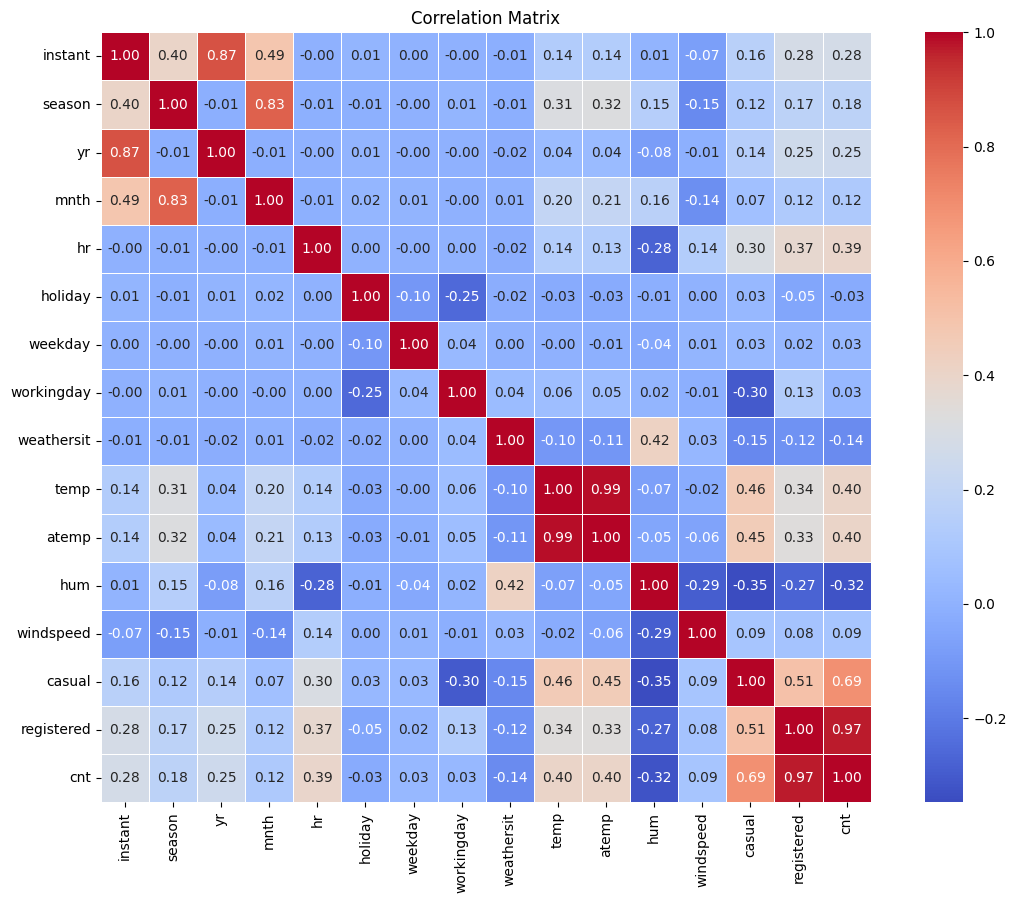

In [5]:
analyzer.plot_correlation_matrix()

Nuomojamų dviračių skaičiui (cnt) didelę įtaką daro valanda (h), o tai rodo teigiamą koreliaciją, rodančią, kad tam tikru paros metu, greičiausiai, piko valandomis, padidėjo nuomos kaina. Registruoti vartotojai turi didelę koreliaciją su bendru nuomos mokesčiu, o paprasti vartotojai rodo nedidelę koreliaciją, o tai rodo, kad registruoti naudotojai nuosekliau prisideda prie nuomos kainos. Temperatūra (temp) ir jutimo temperatūra (atemp) taip pat turi vidutinišką teigiamą ryšį su skaičiumi, o tai reiškia, kad palankus oras gali paskatinti dviračių nuomą. Sezonas rodo nedidelę teigiamą koreliaciją su nuomos mokesčiais, o tai rodo, kad paklausa vasarą ir rudenį šiek tiek didesnė, nors šis poveikis yra silpnesnis nei valandos ar vartotojo tipo. Drėgmė (hum) turi silpną neigiamą koreliaciją su nuoma, o vėjo greitis rodo minimalią koreliaciją, o tai rodo, kad jie gali neturėti reikšmingos įtakos nuomos elgsenai.

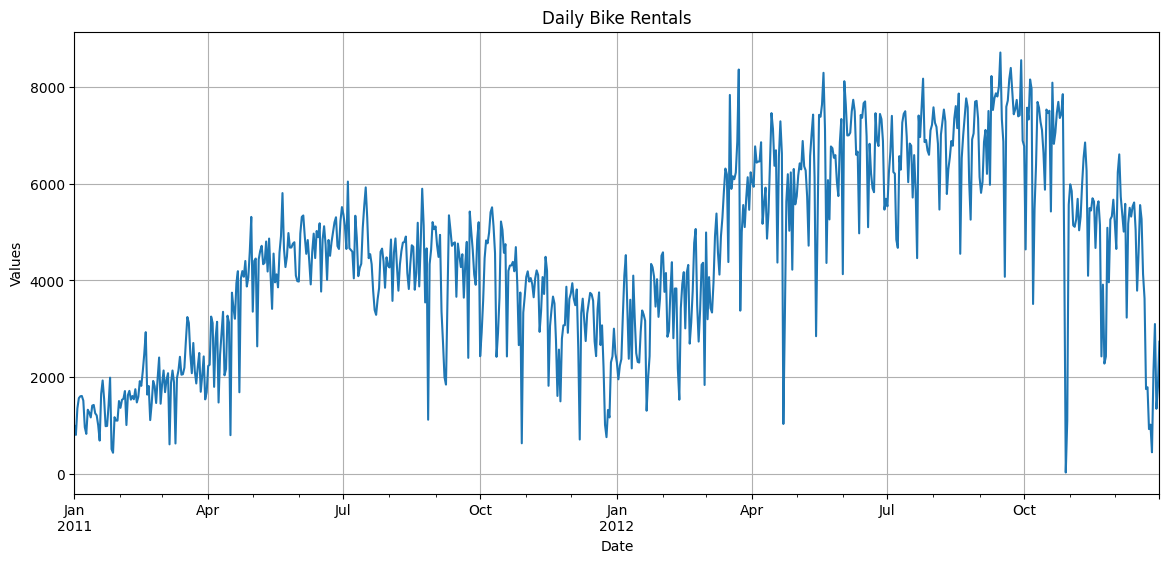

In [6]:
analyzer.plot_time_series(column='cnt', title="Daily Bike Rentals")

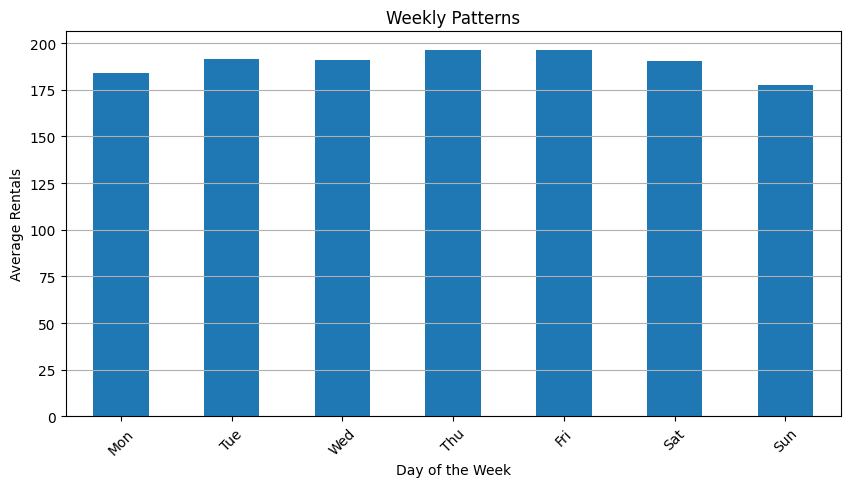

In [7]:
analyzer.plot_weekly_pattern(column='cnt')

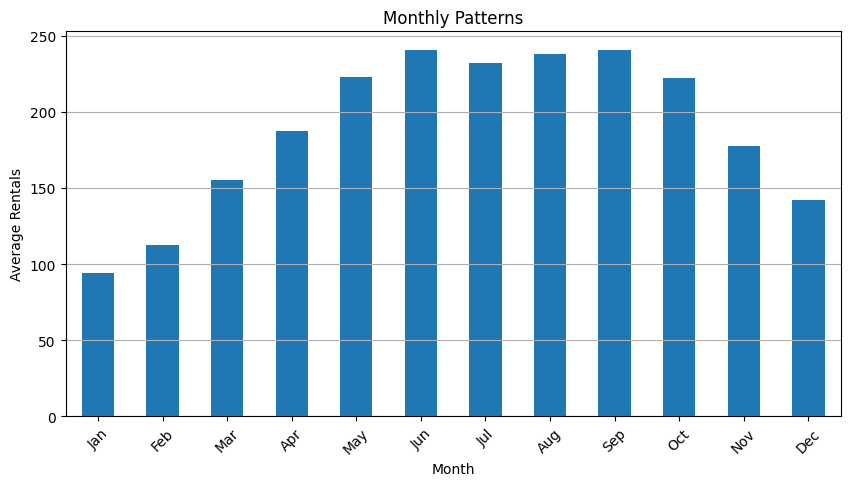

In [8]:
analyzer.plot_monthly_pattern(column='cnt')

Dieninis pattern'as:

Pirmame paveikslėlyje parodyta svyruojanti kasdienė nuomos kaina su bendra augimo tendencija per dvejus metus. Yra pastebimų viršūnių ir nuosmukių, kurie greičiausiai atspindi orą, ypatingus įvykius ir sezoninę įtaką.

Savaitės pattern'as:
Ši juostinė diagrama atskleidžia tvirtą darbo dienų modelį, o antradienį, trečiadienį ir ketvirtadienį nuomos kainos yra didesnės. Savaitgalio dienomis (ypač sekmadieniais) pastebimai sumažėjo nuomos kainos, o tai rodo paklausą darbo dienomis.

Sezoniniai pattern'ai (kas mėnesį):
Mėnesio vidurkiai išryškina ryškų sezoninį poveikį, kai didžiausia nuomos kaina būna vasaros mėnesiais (nuo birželio iki rugpjūčio), o žiemą mažėja. Tai sustiprina oro ir sezoninių pageidavimų įtaką dviračio naudojimui.

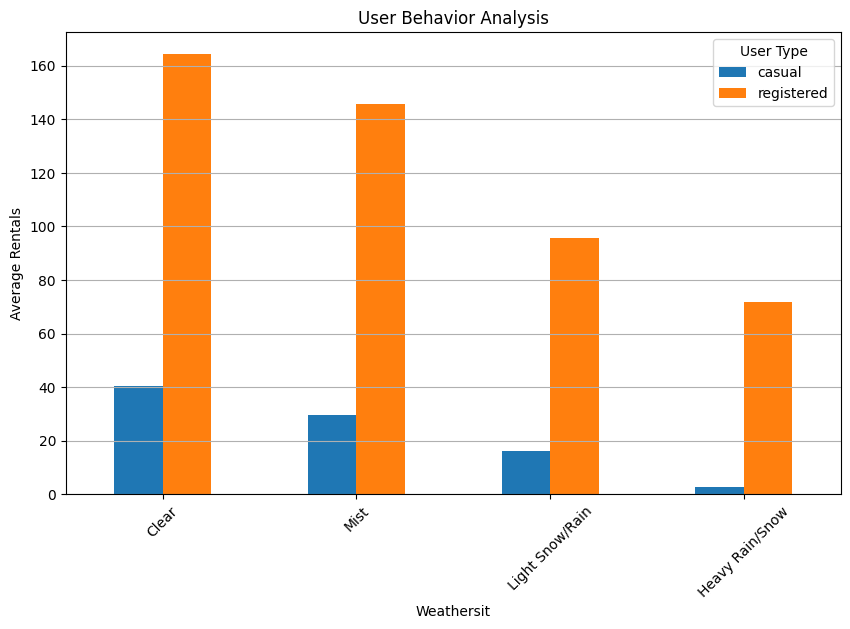

In [9]:
analyzer.plot_user_behavior(group_column='weathersit', user_columns=['casual', 'registered'], labels=["Clear", "Mist", "Light Snow/Rain", "Heavy Rain/Snow"])

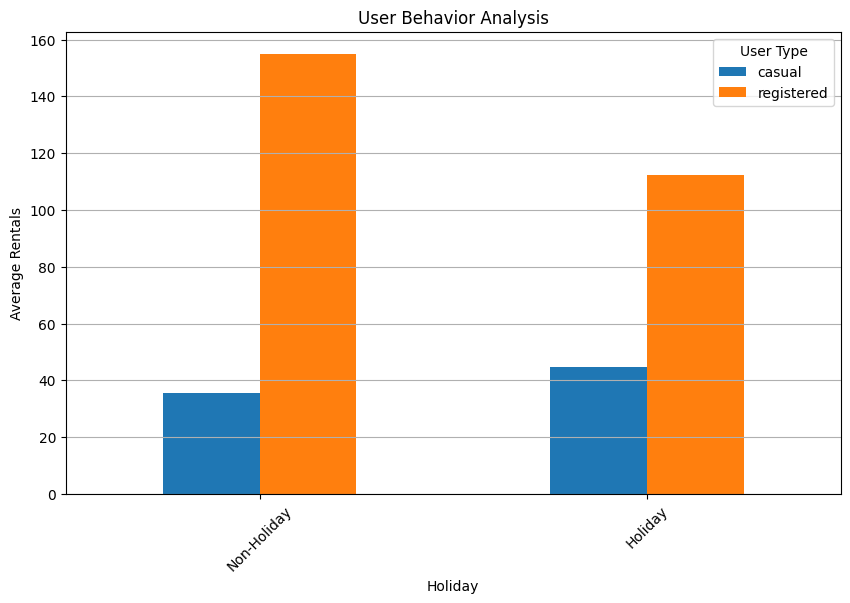

In [10]:
analyzer.plot_user_behavior(group_column='holiday', user_columns=['casual', 'registered'], labels=["Non-Holiday", "Holiday"])

Oro sąlygos:
Paprasti naudotojai: nuomos kaina pastebimai mažėja blogėjant orams, labai sumažėja nedidelio sniego / lietaus, o smarkaus lietaus ar sningant naudojimas yra labai mažas.
Registruoti vartotojai: nors ir veikiami oro sąlygų, registruoti vartotojai yra mažiau jautrūs nei paprasti naudotojai, todėl nuomos modelis yra nuoseklesnis net esant rūkui ar nedideliam sniegui / lietui.

Šventinis ir ne švenčių laikas:
Paprasti vartotojai: nuomos kainos yra didesnės švenčių dienomis, o tai rodo, kad atsitiktiniai naudotojai per šventes greičiausiai užsiima laisvalaikio veikla.
Registruoti vartotojai: ne švenčių dienomis rodykite šiek tiek didesnę nuomos kainą, atspindinčią įprastus kelionės į darbą ir atgal modelius.

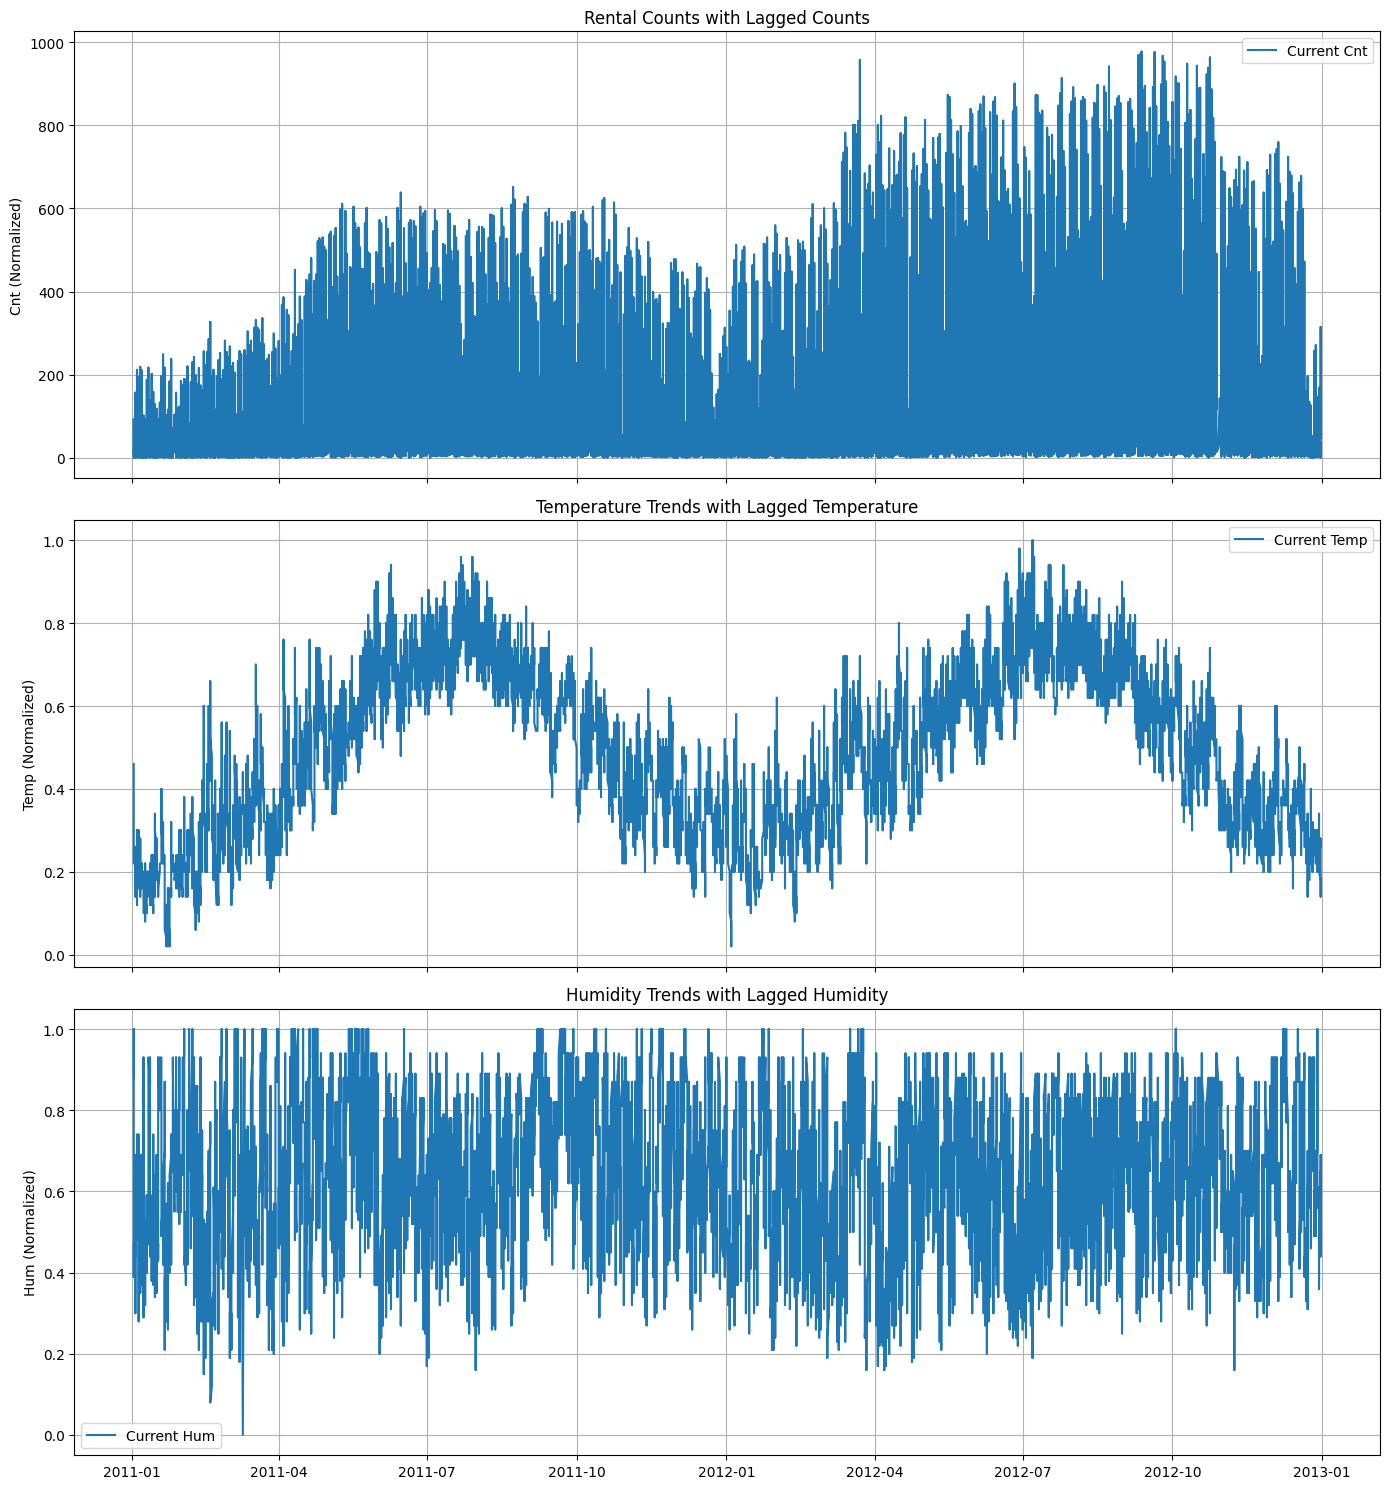

In [11]:
analyzer.plot_lagged_features(columns=['cnt'], lags=[1, 24])

Nuomos skaičiai (dabartinė, ankstesnė valanda, ankstesnė diena):
Pastebimas tęstinumas, ypač tarp dabartinio skaičiaus ir praėjusios valandos, su panašiomis viršūnėmis ir slėniais.
Ankstesnių dienų skaičius taip pat rodo koreliaciją su dabartiniu skaičiumi, nors jis yra vidutiniškas.

Temperatūros tendencijos:
Dabartinė temperatūra labai sutampa su ankstesnės valandos temperatūra, ypač dienos skalėje, rodant laipsniškus poslinkius, o ne staigius pokyčius.

Drėgmės tendencijos:
Drėgmės tendencijos taip pat atitinka panašų valandinį tęstinumą, kai dabartinės ir ankstesnės valandos vertės yra glaudžiai suderintos, atspindinčios stabilias sąlygas per trumpą laikotarpį.

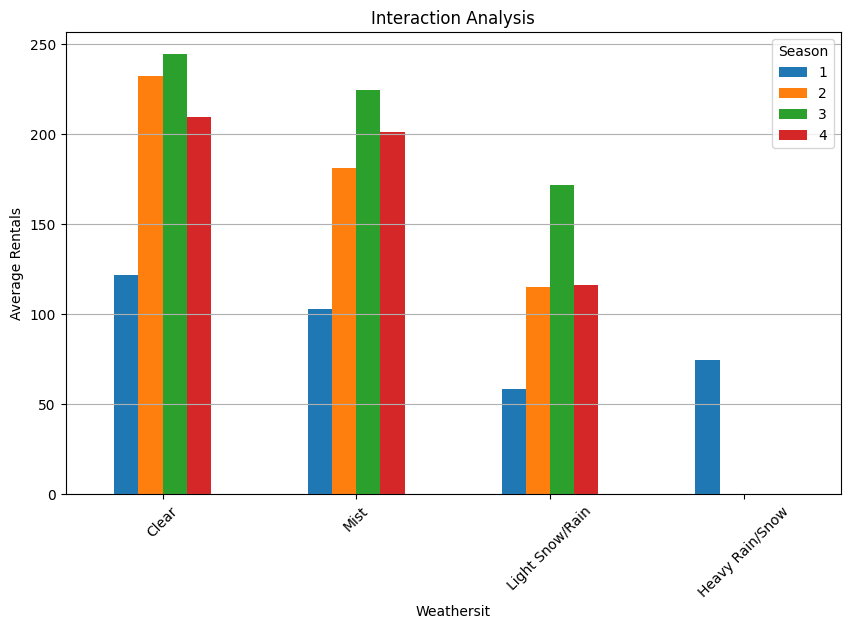

In [12]:
analyzer.plot_interaction(group_columns=['weathersit', 'season'], labels=["Clear", "Mist", "Light Snow/Rain", "Heavy Rain/Snow"])

Orų ir sezono sąveika:
Giedras oras: nuomos kainos yra didžiausios esant giedram orui visais metų laikais, o vasarą daugiausia naudojamasi, o po to seka rudenį ir pavasarį.
Rūkas ir nedidelis sniegas / lietus: nuomos kaina mažėja esant ūkanotam arba silpnam sniegui / lietui, ypač žiemą, o tai rodo, kad dviračių naudojimas sumažėja dėl šaltesnių ir drėgnesnių sąlygų.
Stiprus lietus / sniegas: stipriai lyjant ar sningant, ypač žiemą, dviračių nuoma labai sumažėja, o tai rodo, kad šios ekstremalios sąlygos daro didelę įtaką nuomos elgsenai.

In [13]:
# Create lag features for previous hour and previous day counts
data['cnt_prev_hour'] = data['cnt'].shift(1)   # Previous hour count
data['cnt_prev_day'] = data['cnt'].shift(24)   # Previous day count

# Create lagged environmental factors for the previous hour
data['temp_prev_hour'] = data['temp'].shift(1)
data['hum_prev_hour'] = data['hum'].shift(1)
data['windspeed_prev_hour'] = data['windspeed'].shift(1)

# Drop initial rows with NaN values due to lagging
lagged_data = data.dropna()

# Display the first few rows to verify the lagged feature creation
lagged_data[['cnt', 'cnt_prev_hour', 'cnt_prev_day', 'temp_prev_hour', 'hum_prev_hour', 'windspeed_prev_hour']].head()

,cnt,cnt_prev_hour,cnt_prev_day,temp_prev_hour,hum_prev_hour,windspeed_prev_hour
24,17,39.0,16.0,0.46,0.88,0.2985
25,17,17.0,40.0,0.46,0.88,0.2985
26,9,17.0,32.0,0.44,0.94,0.2537
27,6,9.0,13.0,0.42,1.00,0.2836
28,3,6.0,1.0,0.46,0.94,0.1940


In [14]:
features = ['season', 'hr', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 
            'cnt_prev_hour', 'cnt_prev_day']
target = 'cnt'

# Instantiate and use the DecisionTreeModel class
dt_model = DecisionTreeModel(data=lagged_data, features=features, target=target)
dt_model.train()
mse, r2 = dt_model.evaluate()
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Inspect the tree structure
tree_depth = dt_model.get_tree_depth()
n_leaves, n_nodes = dt_model.get_tree_structure()
print(f"Tree depth: {tree_depth}")
print(f"Number of leaves: {n_leaves}")
print(f"Number of nodes: {n_nodes}")

# Print feature importances
feature_importances = dt_model.feature_importance()
for feature, importance in feature_importances.items():
    print(f"Feature: {feature}, Importance: {importance}")

# Get and print detailed node structure
node_structure = dt_model.detailed_node_structure()
print("Left child of each node:", node_structure['children_left'])
print("Right child of each node:", node_structure['children_right'])
print("Feature used for split at each node:", node_structure['feature'])
print("Threshold used for split at each node:", node_structure['threshold'])

Mean Squared Error: 2616.7058484586573
R² Score: 0.9203062084132063
Tree depth: 30
Number of leaves: 12929
Number of nodes: 25857
Feature: season, Importance: 0.002419248048006608
Feature: hr, Importance: 0.10950222453017336
Feature: holiday, Importance: 0.0005759345379406764
Feature: workingday, Importance: 0.01613817093424078
Feature: weathersit, Importance: 0.00362247496818549
Feature: temp, Importance: 0.00753288705947468
Feature: hum, Importance: 0.006179274736067302
Feature: windspeed, Importance: 0.004020883195960227
Feature: cnt_prev_hour, Importance: 0.7086877553489814
Feature: cnt_prev_day, Importance: 0.14132114664096954
Left child of each node: [    1     2     3 ... 25855    -1    -1]
Right child of each node: [17648  9617  5040 ... 25856    -1    -1]
Feature used for split at each node: [ 8  8  1 ...  9 -2 -2]
Threshold used for split at each node: [243.5  97.5   5.5 ... 847.5  -2.   -2. ]


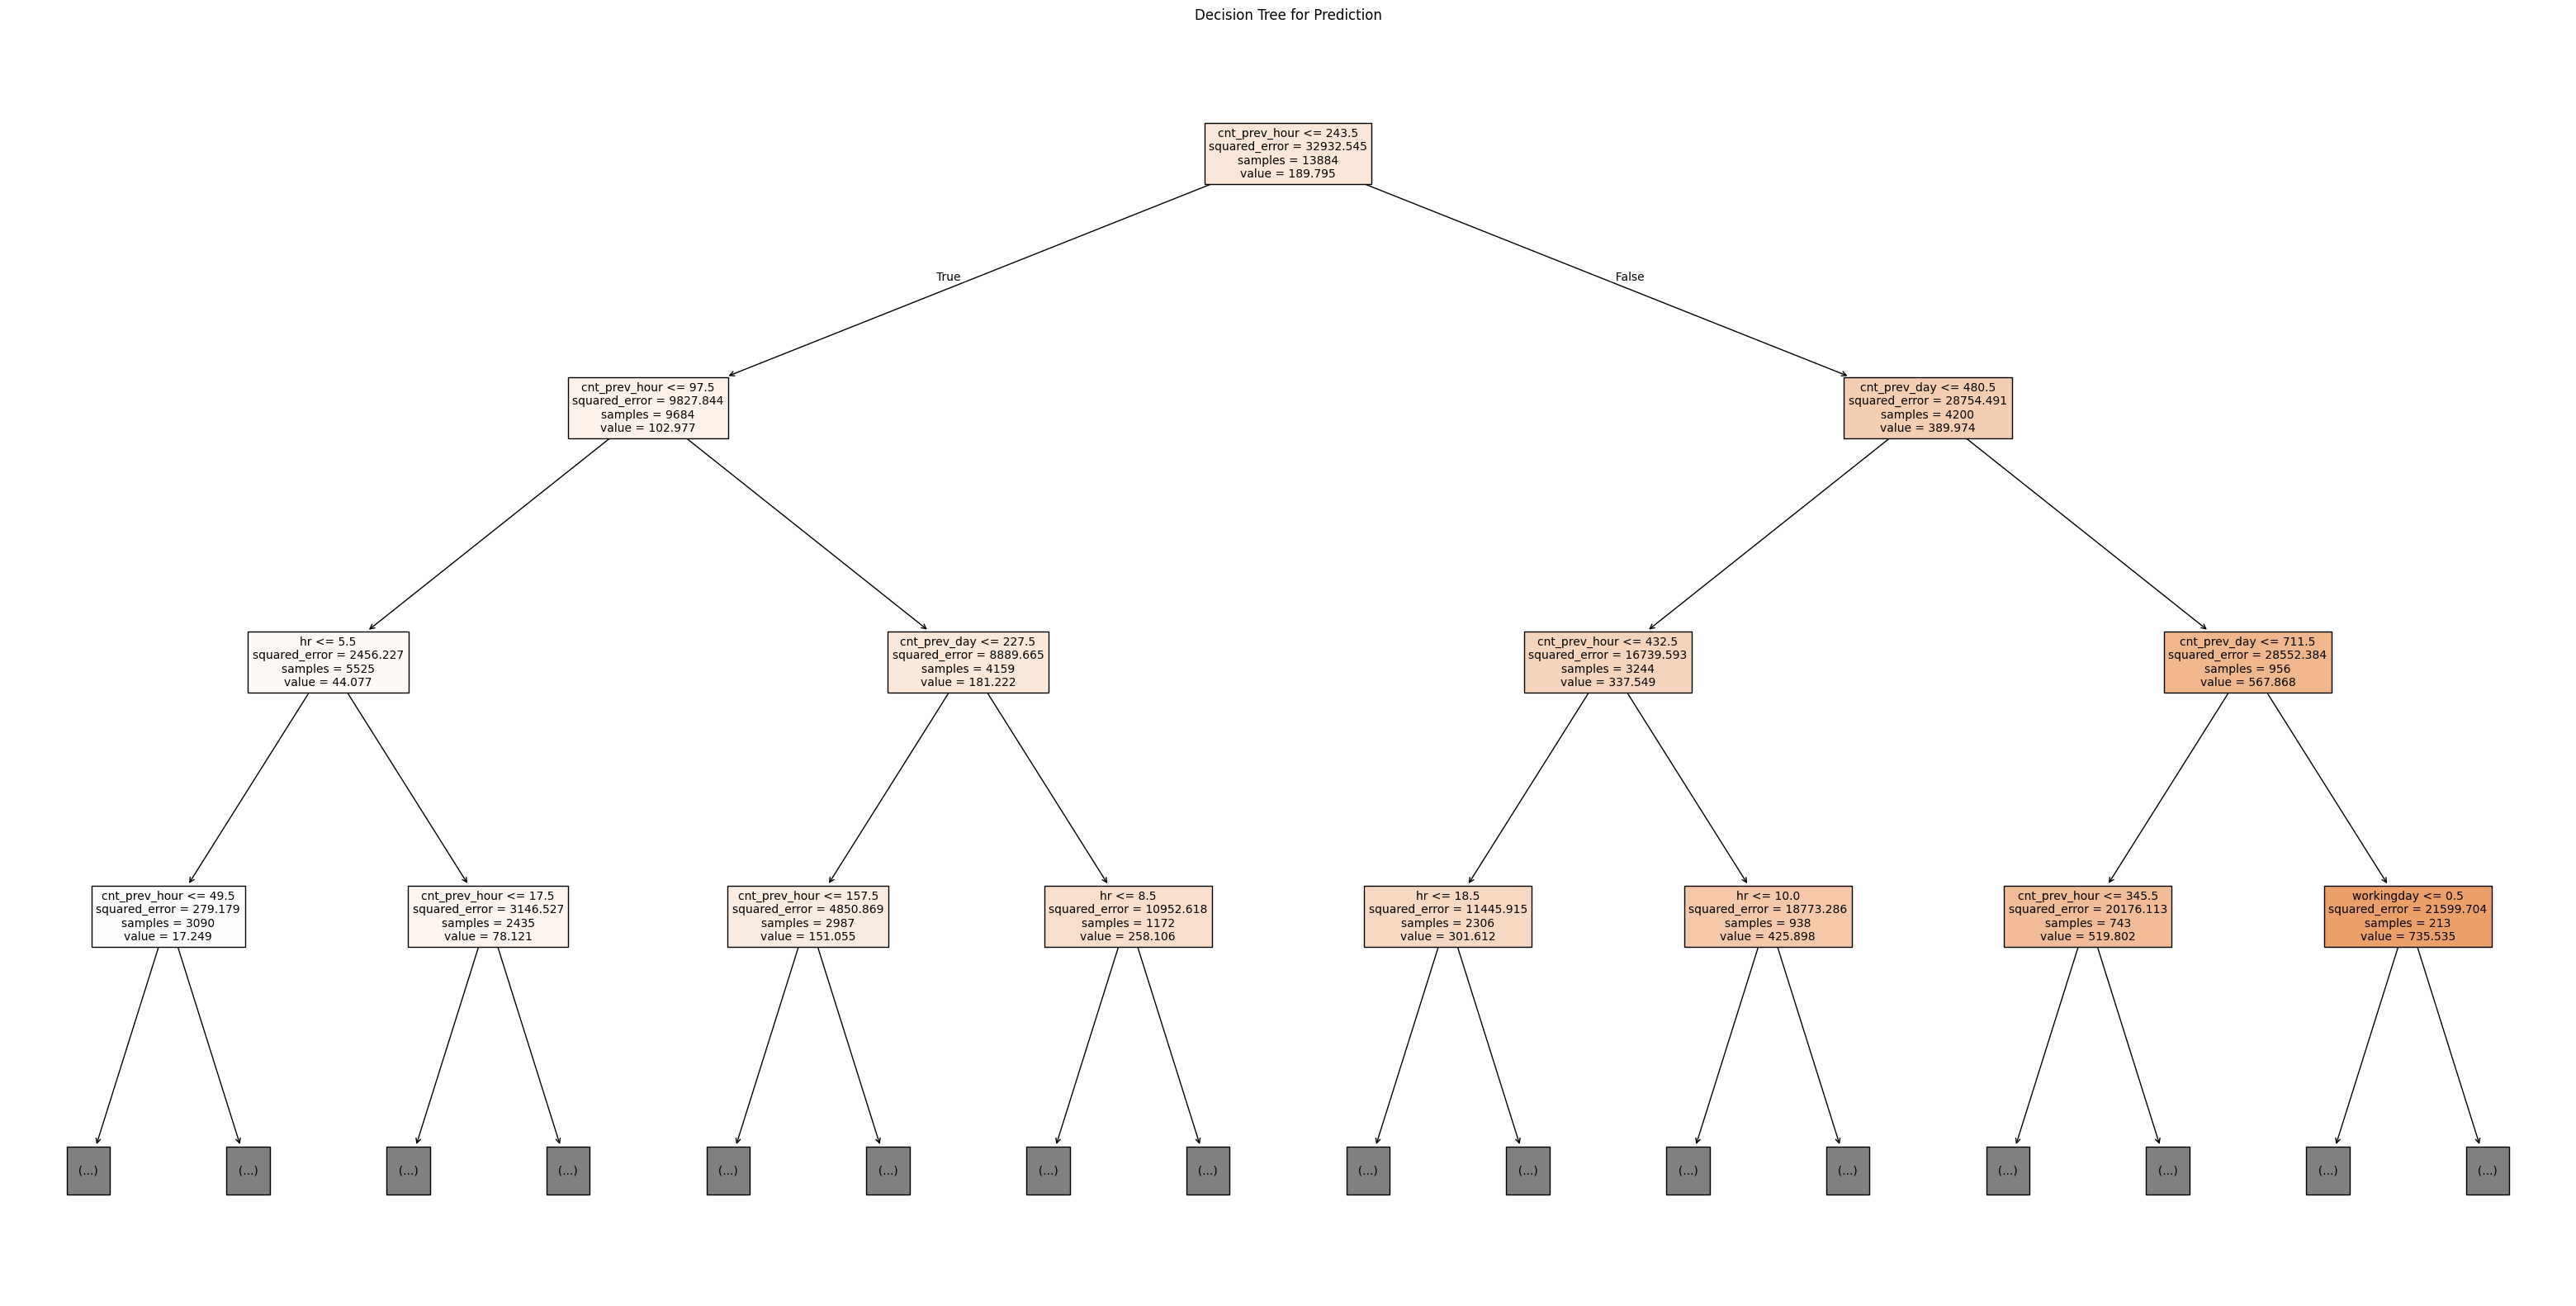

In [15]:
tree_model = dt_model.return_model()
analyzer.plot_decision_tree(tree_model, features)

Sprendimų medžio modelis pasižymi stipriu prognozavimo tikslumu, turėdamas vidutinę kvadratinę paklaidą (MSE) lygią 2616,71 ir R² rezultatą, lygų 0,920, kas rodo, kad modelis paaiškina 92% tikslinės kintamojo `cnt` variacijos. Tai leidžia daryti išvadą, kad modelis efektyviai atspindi duomenų dėsningumus. Tačiau medžio sudėtingumas akivaizdus dėl jo 30 gylio, 12929 lapų ir 25857 mazgų. Toks didelis gylis ir mazgų skaičius gali rodyti per didelį pritaikymą (angl. overfitting), kai modelis gerai veikia mokymo duomenyse, bet gali susidurti su sunkumais, susidūrus su naujais duomenimis. Šis sudėtingumas yra pagrįstas detalizuotais skilimais ir aukštu granuliuotumo lygiu, o tai gali riboti modelio gebėjimą generalizuoti.

Svarbių požymių analizė atskleidžia, kad modelis stipriai priklauso nuo laiko kintamųjų, kur `cnt_prev_hour` (svarbumas 0,7087), `hr` (0,1095) ir `cnt_prev_day` (0,1413) yra įtakingiausi požymiai. Tai rodo, kad nuo laiko priklausomi kintamieji atlieka svarbų vaidmenį prognozuojant `cnt`, o tokie požymiai kaip `holiday`, `weathersit` ir `windspeed` prisideda palyginti mažai. Modelis suskaido pagal įvairius požymius tam tikrose ribose, kad tiksliau numatytų prognozes, remiantis laiko raštų duomenimis. Nors šis nuo laiko priklausomas dėmesys padeda užfiksuoti istorinių skaičių raštus, medžio struktūros sudėtingumas ir detalūs skilimai gali prireikti genėjimo ar gylio apribojimo, siekiant pagerinti modelio atsparumą ir sumažinti per didelio pritaikymo riziką.

5.

**Išvados** </br>
***Duomenų paruošimas ir tyrimas:*** Sėkmingai atliktas duomenų valymo ir paruošimo etapas leido identifikuoti ir pašalinti trūkstamas reikšmes bei išskirtis, taip pat atmesti nereikšmingus bruožus. Eksploracinės duomenų analizės metu nustatėme reikšmingas duomenų rinkinio tendencijas, dėsningumus ir koreliacijas. Šios analizės rezultatai suteikė gilų supratimą apie vartotojų elgesį ir sezoniškumo įtaką dviračių nuomos paklausai, padėdami geriau suprasti pagrindinius veiksnius, lemiančius paklausos svyravimus.

***Sprendimų medžio modelio kūrimas:*** Sukurtas sprendimų medžio modelis sėkmingai prognozuoja dviračių nuomos paklausą, atsižvelgiant į įvairius veiksnius, tokius kaip oras, sezonas, paros laikas ir vartotojo tipas. Modelio efektyvumas buvo įvertintas pagal tinkamus rodiklius, tokius kaip MSE ir R², kurie parodė aukštą prognozių tikslumą. Optimizavimo proceso metu modelis buvo patobulintas, siekiant užtikrinti geresnį interpretavimą ir mažesnę per didelio pritaikymo riziką, todėl galutinis modelis yra patikimas ir lengvai interpretuojamas.

***Analizės modulių kūrimas:*** Sukurtas specialus modulis dviračių dalinimosi duomenų analizei padėjo efektyviai atlikti duomenų apdorojimą ir bruožų inžineriją. Modulis buvo išsamiai dokumentuotas ir pademonstruotas sprendimų medžio modelio kūrimo procese, palengvinant analizės bei prognozių kūrimo užduotis. Jo pritaikymas leido automatizuoti svarbius analizės etapus, pagerinti analizės efektyvumą ir užtikrinti sklandų sprendimų medžio modelio taikymą.

6.
Duomenys galima parisisiųsti: https://capitalbikeshare.com/system-data
